# NLP

텍스트, 음성, 이미지 처리  
언어적인 요소를 알아야 한다.  

챗봇은 문맥을 파악할 줄 알아야함 실제로는 그게 잘 안됨  
문맥간의 연결정보를 잘 못 찾는다.  

nlp는 qa시스템임. 알아서 방대한 양의 데이터로 answer을 만드는 것  -> 잘안된다.  
그래서 많이하는게 형태소 분석이다. -> 어근을 찾기위해서  

형태소 분석 : 거의 마지막 단계 쯤에 있음 , 어근을 뽑아낼 수 있다.  
구문 분석  
의미분석    
담론분석 : 잘 안됨


koNLpy, NLTK (한국어 지원 안함)  

In [1]:
import nltk

영어는 -er인 경우 사람이거나 하는데 한국말은 딱히 정의할 수 없음   
그렇다면 steaming을 어떻게 해야할까?  

In [4]:
from nltk.tokenize import sent_tokenize

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\김엄마\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:
import sqlite3
con = sqlite3.connect("NaverNEWS.db")
cur = con.cursor()

In [21]:
cur.execute("""
    SELECT content
    FROM table2
    ORDER BY id ASC
""")
corpus = [_[0] for _ in cur.fetchall()]

In [25]:
len(corpus[0]),len(corpus[0].split()), len(corpus[0].splitlines())
# 443 -> split 결과
# 47 -> split 라인 결과

(1968, 443, 47)

In [26]:
from nltk.tokenize import sent_tokenize
len(sent_tokenize(corpus[0]))

#실제 20개의 문장이 있음

20

In [27]:
corpus[0].splitlines()[0]
# 문장이 다 안끝나서 의미를 파악 하기 힘듬

'"합리적 보수 주춧돌 되길 바랐는데" 줄지어 추모'

In [30]:
sent_tokenize(corpus[0])[0]
# 하나의 완벽한 문장이나 문맥이 필요함
# 품사에 맞는 형태소, 어근, 어간이 숨어 있을 수 있음. 
# nlp를 통해서 분석하려면 토큰화를 통해서 분석해야한다.

'"합리적 보수 주춧돌 되길 바랐는데" 줄지어 추모\n\n정두언 빈소 찾은 조문객들(서울=연합뉴스) 신준희 기자 = 17일 서울 서대문구 세브란스병원 장례식장에 마련된 고 정두언 전 새누리당 의원의 빈소에서 조문객들이 조문하고 있다.'

In [31]:
sent_tokenize("MeCab")
#text와 언어가 기본으로 영어로 되어있음
# 리눅스에서만 쓸수 있음,유명한 형태소 분석 -> MeCab

['MeCab']

In [34]:
from string import punctuation
punctuation
# 구두점을 기반으로 자른다.

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
# mecab이 영어일 때 문자을 어떻게 끊는지 봐보자
sent_tokenize("""
    Life is too short, Life is too short
""")
# 하나의 문장으로 인식됨

['\n    Life is too short, Life is too short']

In [37]:
sent_tokenize("""
    Life is too short. Life is too short
""")
# 구두점(.)이 있으면 자른다.

['\n    Life is too short.', 'Life is too short']

In [39]:
sent_tokenize("""
    Life is too short... Life is too short
""")
# 안자른다
# ! 나 ?는 무조건 자른다.
# 결과적으로 . ! ? 가 없으면 자르지 않는다. (영어 일 때)
# 한글도 마찬가지로 구두점에서 자른다.

['\n    Life is too short... Life is too short']

In [44]:
sent_tokenize("""
    집에 가고 싶다. 수업 듣기 "싫다"..집에 보내줘!
""")

# .은 자르고 ..은 안자르고 !은 자르고
# 구어체에서는 사용하기 힘들다.

['\n    집에 가고 싶다.', '수업 듣기 "싫다"..집에 보내줘!']

우리나라 언어는 축약이나 생략, 어순이 바뀌어도 의미가 통하기 때문에 분석하기 힘들다.   
구어체 분석 x , 문어체 분석해야한다.

In [51]:
from nltk.tokenize import word_tokenize
word_tokenize("Life is too short, Life is too short")
# 단어 단위로 
# 구두점을 가지고 자름 (spilt), 앞의 short과 뒤의 short을 하나로 인식한다.

['Life', 'is', 'too', 'short', ',', 'Life', 'is', 'too', 'short']

In [60]:
word_tokenize("""
    술 한잔 마셨습니다... 영화가 잘 안되도 좋습니다. 하지만, '엄복동' 하나만 "기억"해 주세요 진심을 다해 전합니다.""")

['술',
 '한잔',
 '마셨습니다',
 '...',
 '영화가',
 '잘',
 '안되도',
 '좋습니다',
 '.',
 '하지만',
 ',',
 "'엄복동",
 "'",
 '하나만',
 '``',
 '기억',
 "''",
 '해',
 '주세요',
 '진심을',
 '다해',
 '전합니다',
 '.']

In [65]:
from nltk.tokenize import TweetTokenizer
word_tokenize("You need Pyhthon ;(")
# 이모티콘이 각각으로 인식됨

['You', 'need', 'Pyhthon', ';', '(']

In [67]:
TweetTokenizer().tokenize("You need Pyhthon ;(")
# 이모티콘으로 인식 됨 ( 감성분석 때 필요)

['You', 'need', 'Pyhthon', ';(']

In [77]:
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b(\w+)\b")
# 공백으로 구분 되는 애들 사이에 있는 모든 문자(알파벳, 대소문자, 숫자, _) : 영어와 숫자로만 이루어진 어절

In [79]:
regexp_tokenize("You nedd Python!!!!! 12 흑*^$흑",pattern)

['You', 'nedd', 'Python', '12', '흑', '흑']

In [80]:
pattern = re.compile(r"\b([가-힣]+)\b")
# 한글만 추출하기

In [108]:
regexp_tokenize("You need Python!!!!! 12 ㅠㅠ 사*^$랑",pattern)
#토큰을 얼만큼 짜르냐에 따라서 원래 의미를 잃어버릴 수도 있다.
#의도는 사랑이지만 사 와 랑으로 추출됨

['사', '랑']

In [109]:
re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]", "", "ㅠㅠ ㅜㅜ ㅋㅋ 사*#랑")
# 1. 문자를 먼저 자른다. ㄱ~ㅎ 나 ㅏ~ㅣ 또는 가~힣 으로 끝나는 모든 단어를 제외하고 자른다.
# 결과적으로 문자가 먼저 다 잘림

'ㅠㅠㅜㅜㅋㅋ사랑'

In [111]:
regexp_tokenize(re.sub(r"[^ ㄱ-ㅎㅏ-ㅣ가-힣]", "", "ㅠㅠ ㅜㅜ ㅋㅋ 사*#랑"),pattern)
#문자가 잘린 상태에서 pattern을 적용한다. 
# pattern은 가-힣으로 시작하는 단어 빼고 다 지우기

['사랑']

In [92]:
from nltk import Text
text = Text(word_tokenize(corpus[0]))

In [93]:
text.vocab().B(), text.vocab().N()

# vocal은 vocabu 에대한 키벨류 쌍을 가지고 있음, B는 유니크한 애들

(293, 555)

In [95]:
text.vocab().most_common(30)
# 기사 중에 가장 많이 나온 표현 
# 구두점 이 너무 많이 나와 있음 -> 사실상 필요한 정보가 아님

[('.', 18),
 ('전', 14),
 ('``', 12),
 ("''", 12),
 ('정두언', 11),
 ('(', 11),
 (')', 11),
 ('고', 11),
 ('서울=연합뉴스', 7),
 ('기자', 7),
 ('=', 7),
 ('17일', 7),
 ('서울', 7),
 ('@', 7),
 ('yna.co.kr', 7),
 (',', 7),
 ('의원', 7),
 ('신준희', 6),
 ('있다', 6),
 ('hama', 6),
 ('의원은', 6),
 ('의원의', 5),
 ('빈소를', 5),
 ('빈소', 4),
 ('찾은', 4),
 ('세브란스병원', 4),
 ('장례식장에', 4),
 ('마련된', 4),
 ('새누리당', 4),
 ('조문하고', 4)]

c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, fla

c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, fla

c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50613 missing from current font.
  font.set_text(s, 0.0, fla

c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47484 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52286 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_text(s, 0, flags=flags)


c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47088 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0, flags=flags)


c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44403 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55176 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44192 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48157 missing from current font.
  font.set_text(s, 0, flags=flags)


c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 44163 missing from current font.
  font.load_char(ord(s), flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45772 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51228 missing from current font.
  font.load_char(ord(s), flags=f

c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45440 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\김엄마\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 55141 missing from current font.
  font.load_char(ord(s), flags=flags)


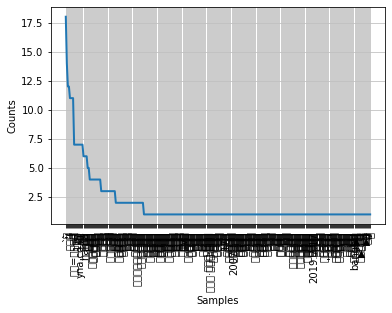

In [104]:
import matplotlib
text.plot()

# Empirical Law

영어에서 to, a 와 같은 전치사가 자주 나오고   
한글 같은 경우에는 어미에 해당하는 부분, 조사에 해당되는 것이 많이 나옴  

zipf ' s 법칙 : 급격하게 낮아지거나 높아지거나 등을 통한 비율을 가지고 의미가 없는 단어를 찾아낼 수 있다.  
이 법칙에 맞으면 balance가 맞다고 이야기 할 수 있음  
데이터의 편향을 알 수 있다.   


경험적인 모델  
상위 10%와 하위 10%를 제외하면 원하고자 하는 결과를 더 잘 추출할 수 있다

In [112]:
text.vocab().freq("정두언")

0.01981981981981982

In [116]:
ratio = 0.0
for _ in [_[0] for _ in text.vocab().most_common(10)]:
    ratio += text.vocab().freq(_)
    print(text.vocab().freq(_))
print("최종비율",ratio)

# 전체 반복되는 단어 10개가 차지하는 비율이 20% 이상.

0.032432432432432434
0.025225225225225224
0.021621621621621623
0.021621621621621623
0.01981981981981982
0.01981981981981982
0.01981981981981982
0.01981981981981982
0.012612612612612612
0.012612612612612612
최종비율 0.2054054054054054


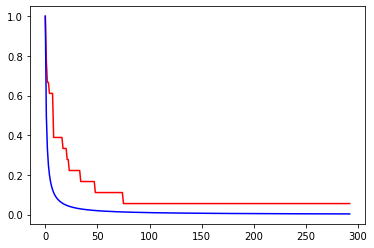

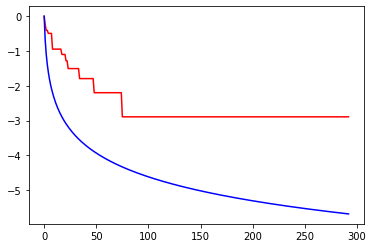

In [118]:
import matplotlib.pyplot as plt
from math import log
token = [_[0] for _ in sorted(text.vocab().items(), key = lambda x:x[1], reverse=True)]
freq = [_[1]/text.vocab().most_common(1)[0][1] for _ in sorted(text.vocab().items(), key = lambda x:x[1], reverse=True)]
_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]

plt.plot([i for i in range(len(token))], freq, "r-")
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()
plt.plot([i for i in range(len(token))], _freq, "r-")
plt.plot([i for i in range(len(token))], _rank, "b-")
plt.show()

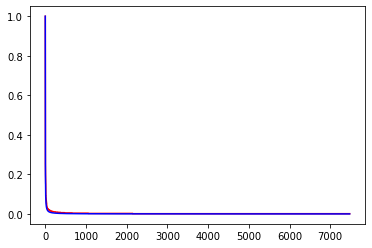

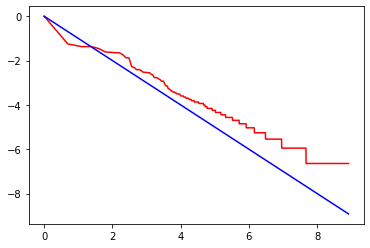

In [120]:
largeText = "\n".join(corpus)
largeText

text = Text(word_tokenize(largeText))
text.vocab().B(), text.vocab().N()

token = [_[0] for _ in sorted(text.vocab().items(), key = lambda x: x[1], reverse=True)]
freq = [_[1]/text.vocab().most_common(1)[0][1] for _ in sorted(text.vocab().items(), key=lambda x:x[1], reverse=True)]

_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]

plt.plot([i for i in range(len(token))], freq, "r-")
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()
plt.plot([log(i+1) for i in range(len(token))], _freq, "r-")
plt.plot([log(i+1) for i in range(len(token))], _rank, "b-")
plt.show()

# 실제 사람들의 언어생활이라는 것은 언어의 다름이 있다고 할지라도
# 경험적인 법칙이 맞아 떨어진다는 증거이다.
# 고빈도와 저빈도 단어 상위 10% 하위10% 를 제외하고 중간 단어를 선택해야한다.


# Heap's Law

그래프와 공식에 의해서 나온 그래프가 비슷하다.   
얼만큼 유니크한 word 인지  
문서의 고유 단어수와 문서길이 사이의 상관관계를 나타낸 함수   


In [125]:
K = 10   #10 - 100
B = 0.4  #0.4 - 0.6
unique = list()
total = list()
heaps = list()
largeText = ""
for _ in corpus:
    largeText += _
    text = Text(largeText)
    unique.append(text.vocab().B()) #vocab중 한번만 쓰인것들의 갯수
    total.append(text.vocab().N()) #vocab에 들어있는 사용된 단어의 갯수
    heaps.append(K*text.vocab().N()**B)
    

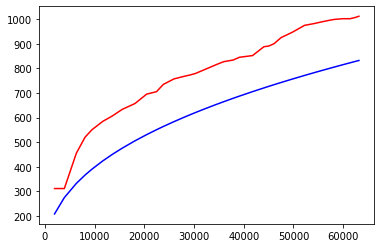

In [127]:
plt.plot(total, unique, "r-")
plt.plot(total, heaps, "b-")
plt.show()

# n-gram

언어를 해석하기 위한 모델  
단순히 빈도와 통계를 통한 모델이다.    
굉장히 많은 피쳐를 생성해 낸다는 단점     
특히나 한글에서 피쳐를 어떻게 추출하나 -> 거기에서 더 나아가서 어간을 찾기에 좋은 approch  


단어들의 시퀀스를 통해서 어떤 확률값을 계산하기 위해서 만들어진 랭귀지 모델 중 하나.  
 
얘를 왜 쓸까? -> 다음글자가 뭐가 쓰일지 예측할 수 있다. 확률을 통해서   

간단하게 수학적으로 표현하면 다음에 올 아이를 xi라고 하면  xi부터의 연속적인 시퀀스가 영향을 줄 것이다.   

앞에 특정한 문맥이 있었고 단어들의 나열이 있었음으로 뒤에있는 특정단어가 나타났다.    
다음에 나온 단어를 앞에있는 시퀀스를 충분하게 빈도를 세서 확률적인 통계로 나타내면 어떤 단어가 다음에 올지 알 수 있을 것이다.   

단어와 단어사이의 관계   
구둣점을 제외한 어절 단위의 ngram을 통해서 몇개의 주변 어절들이 뭉쳐서 하나의 시퀀스를 만들어야하는지 찾는 방법이다.     

n 개의 단어 를통해서 n+1개의 단어를 맞추고 싶다.   

given 이 있을 때 given다음에 a가 올 확률 -> 조건부 확률  
given a가 있을때 다음에 sequence가 올 확률 -> 조건부 확률   




In [139]:
sentence = "Life is too short, You need Python"
#어절단위

#패턴만드는게 어렵지 숫자세는거는 쉽다.
def eojeol(sentence, N=2):
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        # i를 하나식 증가시키면서 N개 만큼 묶으면 된다.
#        ngram.append(" ".join(tokens[i:i+N])) #띄어쓰기 포함
        ngram.append(tuple(tokens[i:i+N])) #띄어쓰기 미 포함
    return ngram

eojeol(sentence,3)

[('Life', 'is', 'too'),
 ('is', 'too', 'short'),
 ('too', 'short', ','),
 ('short', ',', 'You'),
 (',', 'You', 'need'),
 ('You', 'need', 'Python')]

In [140]:
from collections import defaultdict

freq = defaultdict(int)
for _ in eojeol(corpus[0]):
    freq[_] += 1
# 바이그램 쌍이 몇번 있었는지

In [141]:
sorted(freq.items(), key=lambda x:x[1], reverse=True)[:10]
# 제일 많이 나타난 쌍 상위 10개 뿌려라

[(('(', '서울=연합뉴스'), 7),
 (('서울=연합뉴스', ')'), 7),
 (('기자', '='), 7),
 (('@', 'yna.co.kr'), 7),
 ((')', '신준희'), 6),
 (('신준희', '기자'), 6),
 (('정두언', '전'), 6),
 (('있다', '.'), 6),
 (('hama', '@'), 6),
 (('고', '정두언'), 5)]

In [147]:
freq[('(','서울=연합뉴스')]/sum(freq.values()) * freq[('서울=연합뉴스',')')]/freq[('(','서울=연합뉴스')]

0.01263537906137184

P(")")?  
P(")"|"서울=연합뉴스")  
P("서울-연합뉴스"|"(")  
P("(")  

In [150]:
[_ for _ in freq if _[1] == ")"]
# 다음과 같은 결과에서 확률값이 가장 큰 값을 계산한다.

[('서울=연합뉴스', ')'), ('故', ')'), ('오른쪽', ')')]

In [154]:
corpus[0].splitlines()[0]

'"합리적 보수 주춧돌 되길 바랐는데" 줄지어 추모'

In [157]:
# 음절 단위

def umjeol(token, N=2):
    tokens = list(token)
    
    ngram = list()
    for i in range(len(tokens)-(N-1)):
#        ngram.append(tuple(tokens[i:i+N])) #띄어쓰기 포함
        ngram.append("".join(tokens[i:i+N])) # 띄어쓰기 미포함
    return ngram
umjeol(corpus[0].splitlines()[0])

# 엄청나게 많은 쌍을만들어낸다.
# 원래단어가 500개 였는데 훨씬 더 넘어간다. 
# 특징을 어떤 특징으로 할건지 선택하면 된다.


['"합',
 '합리',
 '리적',
 '적 ',
 ' 보',
 '보수',
 '수 ',
 ' 주',
 '주춧',
 '춧돌',
 '돌 ',
 ' 되',
 '되길',
 '길 ',
 ' 바',
 '바랐',
 '랐는',
 '는데',
 '데"',
 '" ',
 ' 줄',
 '줄지',
 '지어',
 '어 ',
 ' 추',
 '추모']

# WPM

하나의 단어를 내부단어들로 분리하는 단어 분리 모델

In [158]:
from nltk.corpus import stopwords

In [162]:
print(stopwords.open("english").read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



# BPE


어간 추출하기 위한 방법으로 사용한다.  
어간 추출을 하기위해서 쓴다.  

분리를 한다   
LOW 중에서 LO라는 패턴도 5번 OW라는 패턴도 5번 나온다.
각각의 빈도를 나눈다.  

빈도를 통해서 누가 누가 합쳐져야하고 분리되어야하는지 알 수 있다.  

# Normalization

In [163]:
from nltk.corpus import stopwords
print(stopwords.open("english").read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



In [279]:
tokens = {
    "l o w </w>" : 5,          # low가 들어오면 다 분리해주고 마지막 단어의끝을 \w로 알려준다.
    "l o w e s t </w>" : 2,
    "n e w e r </w>" : 6,
    "r i d e r </w>" : 3
} 

tokens = {
    "아 버 지 가  </w>" : 5,
    "아 버 지 께 서 </w>" : 2,
    "아 버 지 를 </w>" : 6,
    "아 버 지 에 게 </w>" : 3
}
K = max(tokens.values())

for _ in range(100):
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens, K)

pattern = r"[가-힣A-Za-z\/\<\>]{2,}"
result = list()

for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _)
                  if _ != "</w>"])
print(set(result))

{'아버지'}


In [278]:
def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables = token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] += freq
    return ngram

In [245]:
ngram

defaultdict(int,
            {('l', 'ow'): 6,
             ('ow', '</w>'): 3,
             ('ow', 'e'): 3,
             ('e', 'st'): 3,
             ('st', '</w>'): 3,
             ('n', 'ew'): 3,
             ('ew', 'e'): 3,
             ('e', 'r'): 6,
             ('r', '</w>'): 6,
             ('r', 'i'): 3,
             ('i', 'd'): 3,
             ('d', 'e'): 3})

In [217]:
max(ngram, key=lambda x:x[1])

('e', 'st')

In [273]:
def mergeMaxkey(ngram, tokens, K):
    maxKey = max(ngram, key=ngram.get)
    maxValue = max(ngram.values())
    newTokens = dict()
    for token,freq in tokens.items():
        newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token)
                 if maxValue > K else token] = freq

#   print(maxKey)
    return newTokens

In [271]:
pattern = r"[A-Za-z\/\<\>]{2,}"

for _ in tokens:
    print([_ for _ in re.findall(pattern, _)
        if _ != "</w>"])

[]
[]
[]
[]


In [219]:
tokens = newTokens

In [220]:
newTokens

{'l ow </w>': 3, 'l ow est </w>': 3, 'n ew e r </w>': 3, 'r i d e r </w>': 3}